# Uber Trips Analysis for New York City

### Importing important librarires

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


### Importing .csv file to jupyter notebook

In [14]:
df = pd.read_csv('C://Users//Puneet Malan//Desktop//uber-raw-data-sep14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


### Preparing data in days and hour format

In [18]:
df["Date/Time"] = df["Date/Time"].map(pd.to_datetime)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


In [20]:
df["Day"] = pd.to_datetime(df["Date/Time"]).dt.day 
df["Weekday"] = pd.to_datetime(df["Date/Time"]).dt.weekday 
df["Hour"] = pd.to_datetime(df["Date/Time"]).dt.hour 
df.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


### Plotting graphs and visuals

<AxesSubplot: xlabel='Day', ylabel='Count'>

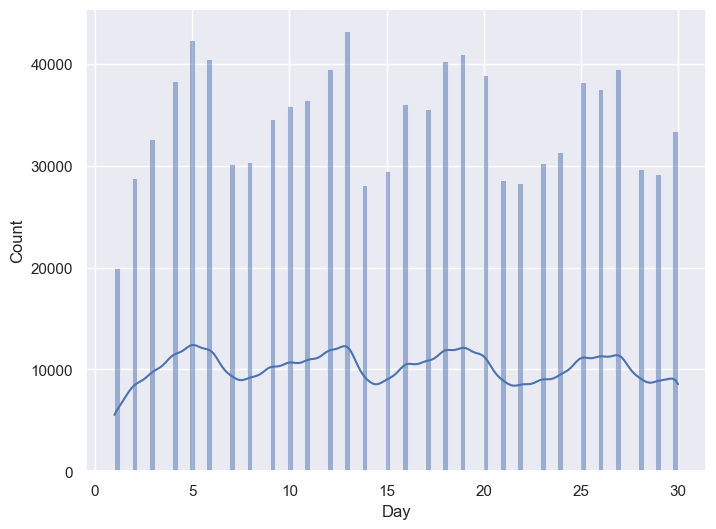

In [39]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.histplot(df["Day"], kde= True)

*From above histogram we can clearly see that Uber trips are rising on the working days and decreases on weekends.*

### Analyzing Uber trips according to Weekdays

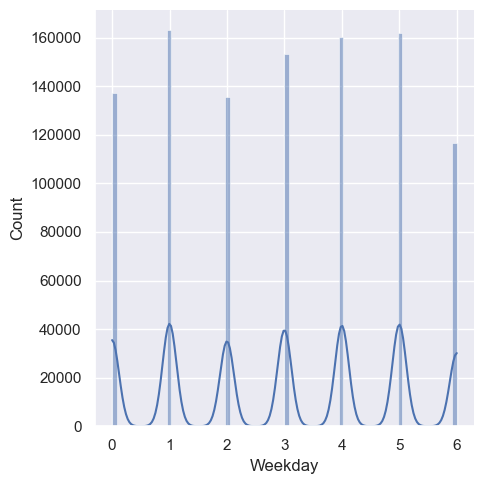

In [40]:
sns.displot(df["Weekday"], kde= True)

*In above histogram 0 indicates Sunday, and on sunday Uber trips are more than saturday so we can say that people also use Uber for outing 
rather than for just going to work. Uber trips are highest on mondays and are lowest on saturdays.*

### Analyzing Uber trips according to Hours

<AxesSubplot: xlabel='Hour', ylabel='Count'>

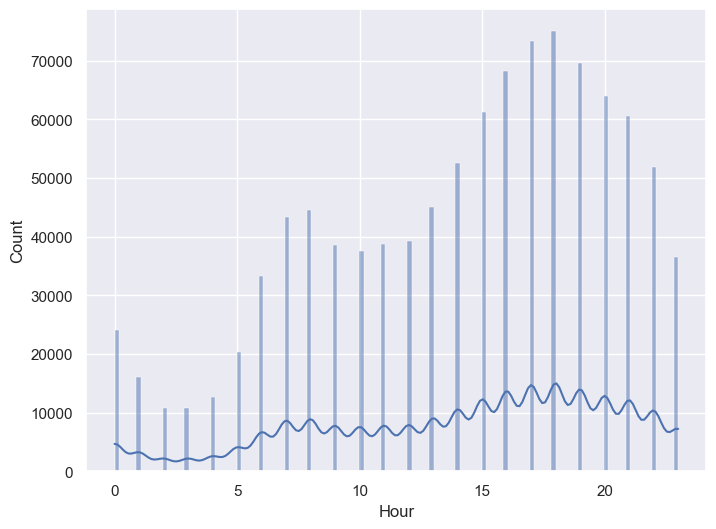

In [41]:
sns.histplot(df["Hour"], kde= True)

*According to hourly data Uber trips decreases after midnight and start incresing after 5 am and keep rising till 6 pm. The busiest hour for Uber is 6 pm after that it start decreasing.*

### Correlation of Hours and Weekdays on Uber trips with the help of Heatmap.

<AxesSubplot: xlabel='Hour', ylabel='Weekday'>

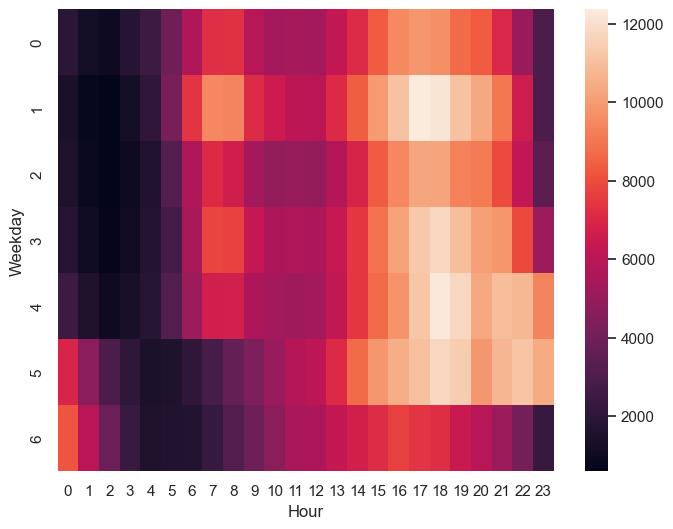

In [43]:
df1 = df.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df1 = df1.unstack()
sns.heatmap(df1, annot= False)

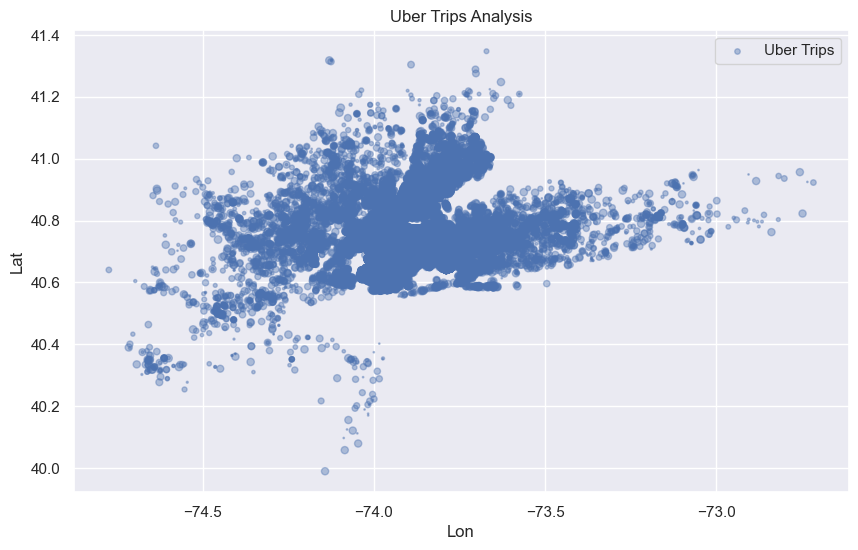

In [47]:
df.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=df["Day"], label='Uber Trips', figsize=(10,6))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

### Conclusions that I have made from this analysis are:
*Monday is the most profitable day for Uber.*

*Uber is less used on saturdays.*

*Busiest hour for Uber is 6 pm.*

*On average a rise in Uber trips start around 5 am.*

*Most of the Uber trips originate near the Manhattan region in New York.*